### 1. Імпорт бібліотек

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### 2. Сформований набір даних

In [6]:
df = pd.read_csv('computer.csv')

In [7]:
df.head()

,Age,Income,Student,CreditRating,Purchase
0,Senior,Low,Yes,Bad,No
1,Middle-aged,High,Yes,Good,Yes
2,Senior,High,No,Good,Yes
3,Middle-aged,Medium,No,Bad,Yes
4,Young,High,Yes,Good,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           100 non-null    object
 1   Income        100 non-null    object
 2   Student       100 non-null    object
 3   CreditRating  100 non-null    object
 4   Purchase      100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


### 3. Побудова дерева вирішальних правил за допомогою алгоритму ID3

Кодування даних для аналізу

In [12]:
df_encoded = df.copy()

label_encoders = {}
for column in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

In [13]:
df_encoded.head()

,Age,Income,Student,CreditRating,Purchase
0,1,1,1,0,0
1,0,0,1,1,1
2,1,0,0,1,1
3,0,2,0,0,1
4,2,0,1,1,1


Поділ датасету на тренувальну та тестувальну частини

In [17]:
X = df_encoded.drop("Purchase", axis=1)
y = df_encoded["Purchase"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Створення та навчання моделі

In [20]:
id3_model = DecisionTreeClassifier(criterion="entropy", random_state=101)
id3_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)

Візуалізація дерева

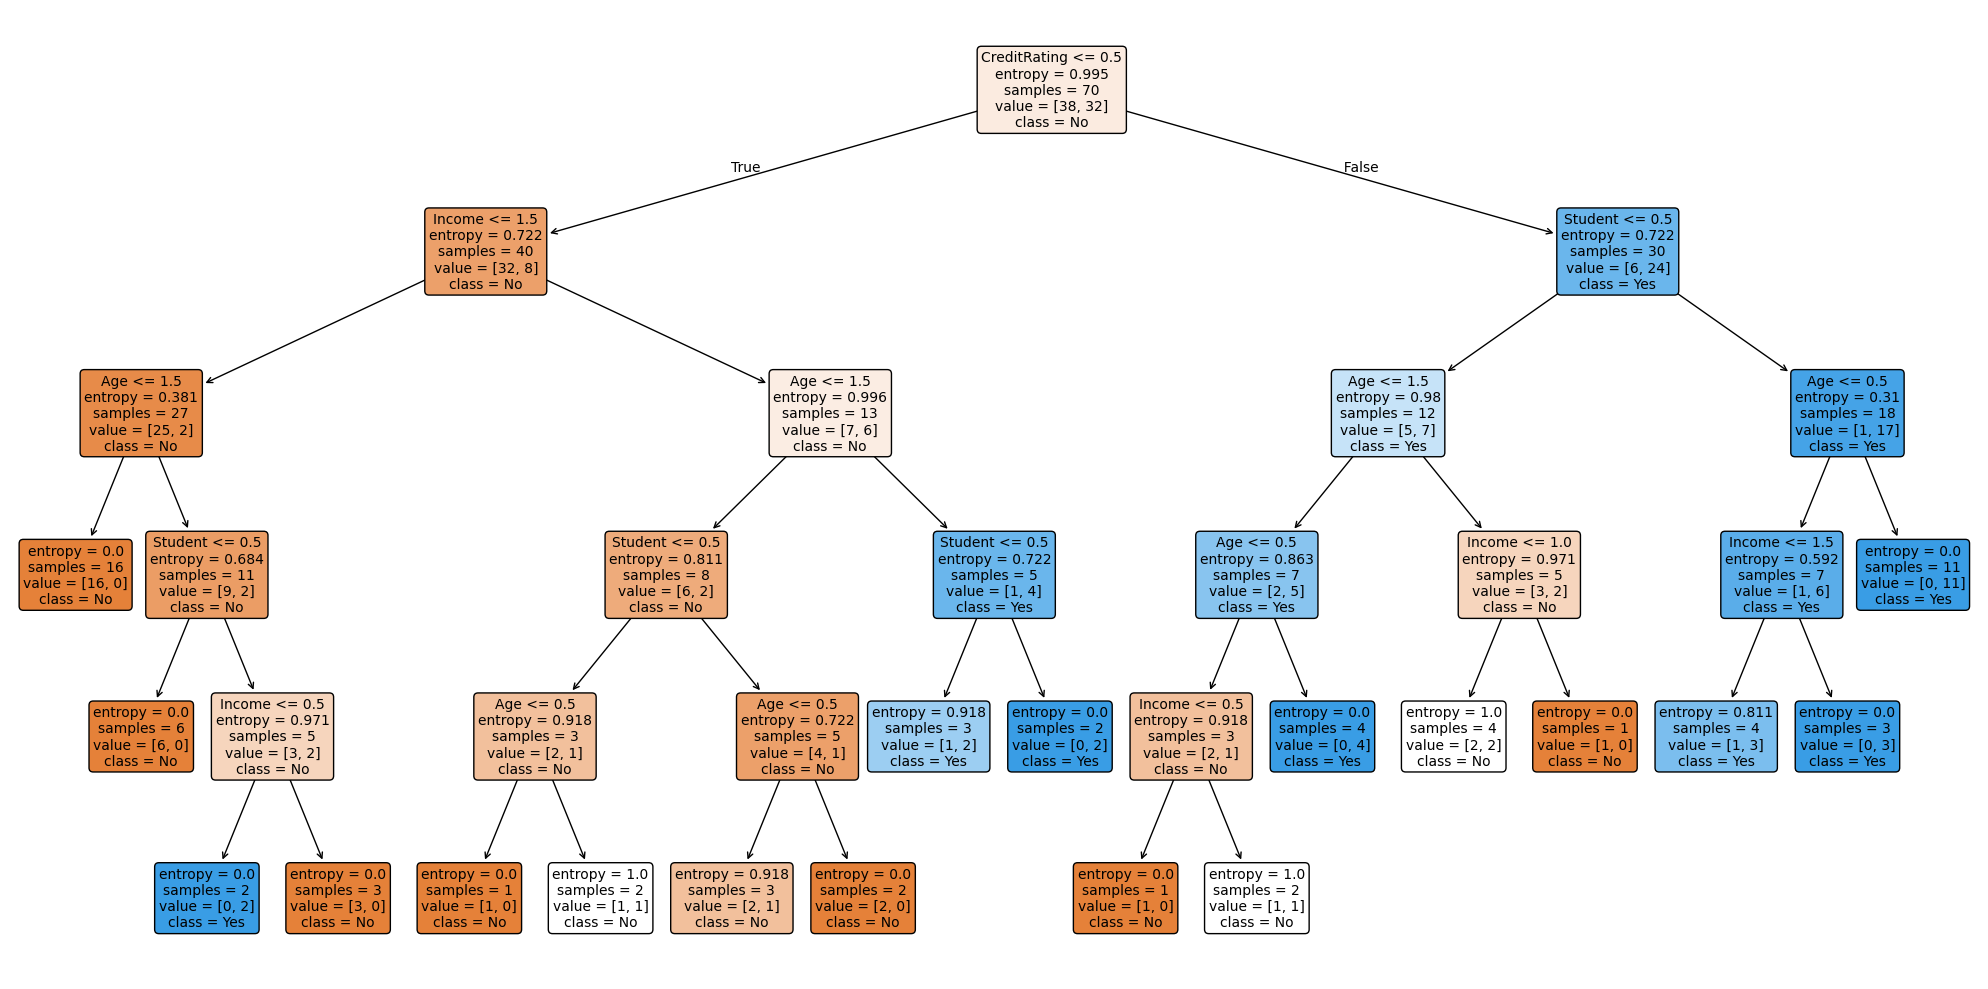

In [25]:
plt.figure(figsize=(20, 10))
plot_tree(id3_model, feature_names=X.columns, class_names=label_encoders["Purchase"].classes_, filled=True, rounded=True, fontsize=10)
plt.tight_layout()

Передбачення даних за допомогою дерева

In [28]:
id3_predictions = id3_model.predict(X_test)

Обчислення точності класифікації дерева

In [31]:
print(f"confusion matrix: \n{confusion_matrix(y_test, id3_predictions)}")
print(f"classification_report: \n{classification_report(y_test, id3_predictions)}")

confusion matrix: 
[[16  0]
 [ 3 11]]
classification_report: 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.79      0.88        14

    accuracy                           0.90        30
   macro avg       0.92      0.89      0.90        30
weighted avg       0.92      0.90      0.90        30



### 5. Відсікання зайвих гілок отриманого дерева рішень

Проведемо відсікання за допомогою параметра ccp_alpha

In [63]:
pruned_model = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.03, random_state=101)
pruned_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.03, criterion='entropy', random_state=101)

Візуалізація дерева

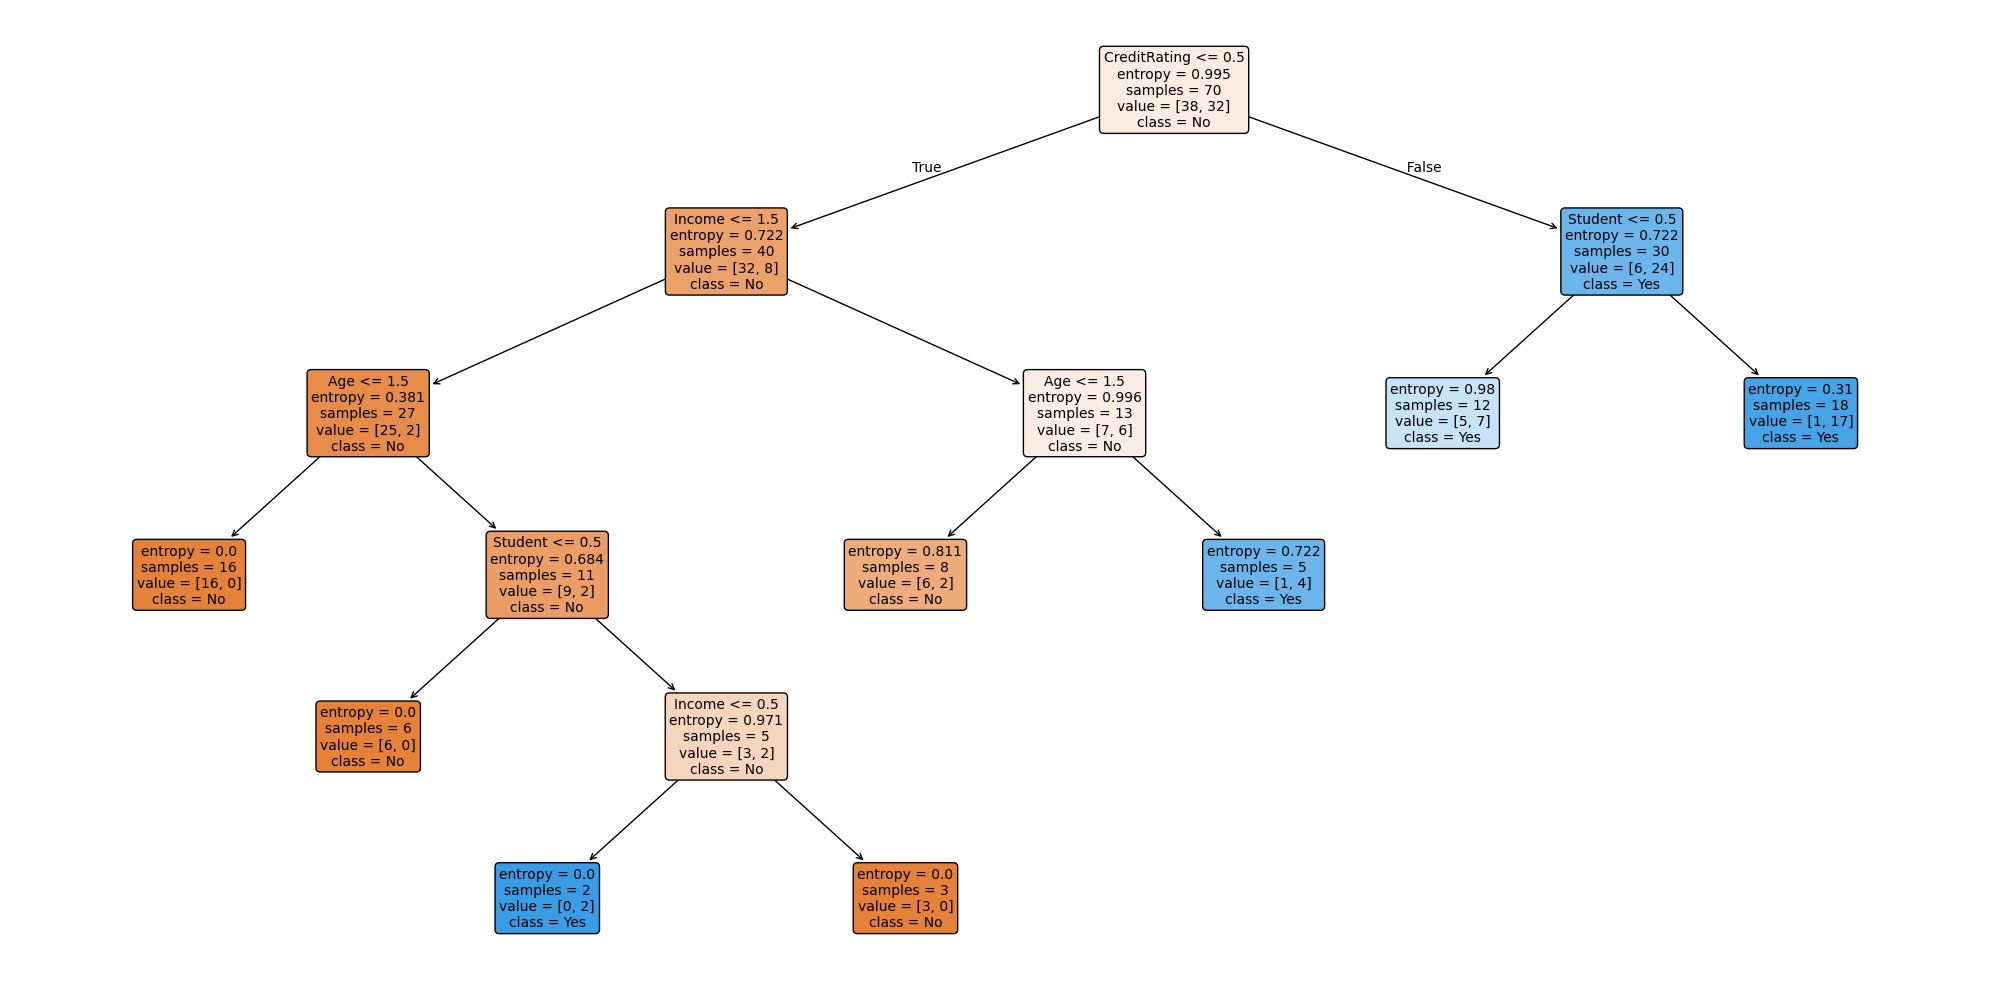

In [64]:
plt.figure(figsize=(20, 10))
plot_tree(pruned_model, feature_names=X.columns, class_names=label_encoders["Purchase"].classes_, filled=True, rounded=True, fontsize=10)
plt.tight_layout()

Передбачення даних за допомогою дерева

In [65]:
pruned_predictions = pruned_model.predict(X_test)

Обчислення точності класифікації дерева

In [68]:
print(f"confusion matrix: \n{confusion_matrix(y_test, pruned_predictions)}")
print(f"\nclassification_report: \n\n{classification_report(y_test, pruned_predictions)}")

confusion matrix: 
[[11  5]
 [ 1 13]]

classification_report: 

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.72      0.93      0.81        14

    accuracy                           0.80        30
   macro avg       0.82      0.81      0.80        30
weighted avg       0.83      0.80      0.80        30

